In [1]:
exec(open("./funcs/mmj_functions.py").read())
exec(open("./funcs/algo_4_funcs.py").read()) 

In [2]:
random.seed(122)
np.random.seed(122)

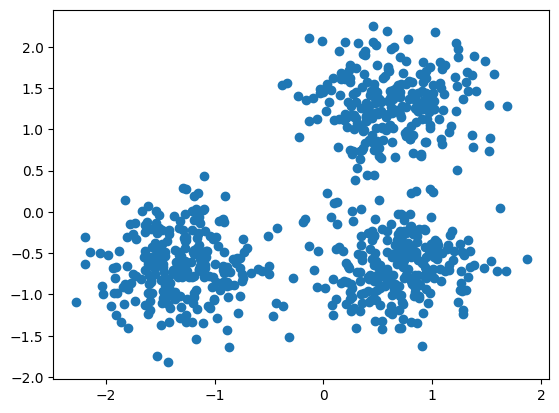

In [3]:
# Demo of DBSCAN clustering algorithm
# See: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html


from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


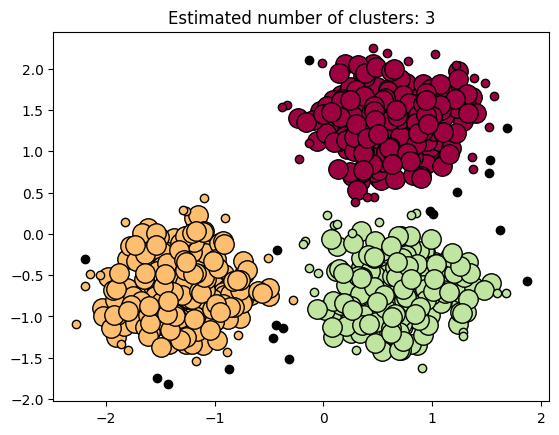

In [5]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [6]:
def mmj_kmeans_multi_one_scom(X, num_clusters, mmj_matrix, attempts = 20): 
    label, centers_idx, loss, strong_ambi_p_idx, weak_ambi_p_idx = KMeans_several_times_ambi_points_multi_one_scom(X, num_clusters, attempts, mmj_matrix) 
    if strong_ambi_p_idx or weak_ambi_p_idx:
        plot_2D_or_3D_data_empty_circles_weak_strong_multi_one_scom(X, label,centers_idx, strong_ambi_p_idx, weak_ambi_p_idx)        
    else:
        plot_2D_or_3D_data(X, label, centers_idx = centers_idx, plot_center = 1)
    return [label, centers_idx, loss, strong_ambi_p_idx, weak_ambi_p_idx]



In [7]:
# # Calculate MMJ distance matrix with Algorithm 1

# mmj_matrix = cal_mmj_matrix_cpp_round_n(X, n = 15)



In [8]:
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058

mmj_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)



In [9]:
num_clusters = 3

Got a better one! 0.012694238402536863


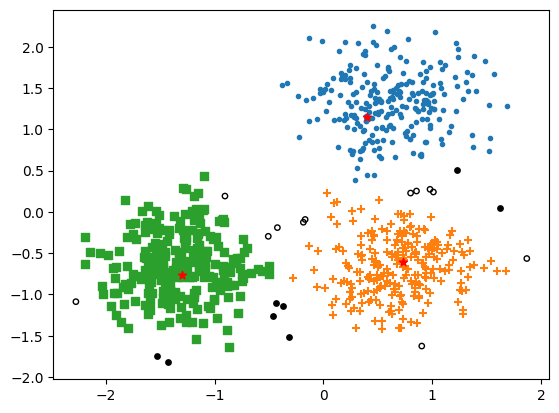

In [10]:
result =  mmj_kmeans_multi_one_scom(X, num_clusters, mmj_matrix, attempts = 20)

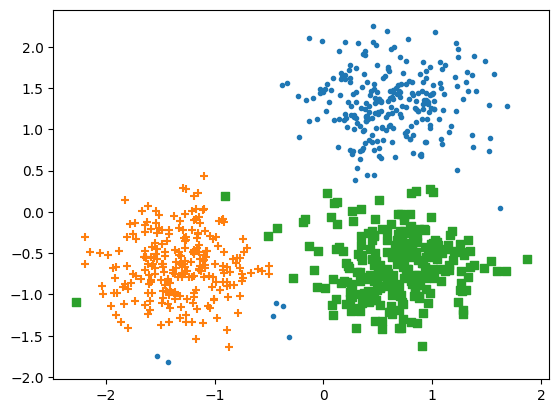

In [11]:
import kmedoids

mmj_matrix_squared = mmj_matrix**2

km_model = kmedoids.fasterpam(mmj_matrix_squared, num_clusters)

 
label = km_model.labels

plot_2D_or_3D_data(X, label)

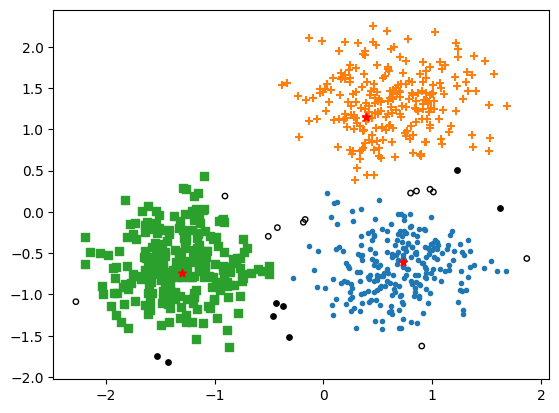

In [12]:

result = MMJ_K_means_using_PAM_algo(X, num_clusters, mmj_matrix_squared, plot = True)


In [13]:
# The black dots are Strong Border Points; the black circles are Weak Border Points.